In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset=load_iris()
X=dataset.data
y=dataset.target

In [3]:

#Splitting the data to train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
X_train.shape

(120, 4)

In [5]:
Y_train.shape

(120,)

In [6]:
X_test.shape

(30, 4)

In [7]:
Y_test.shape

(30,)

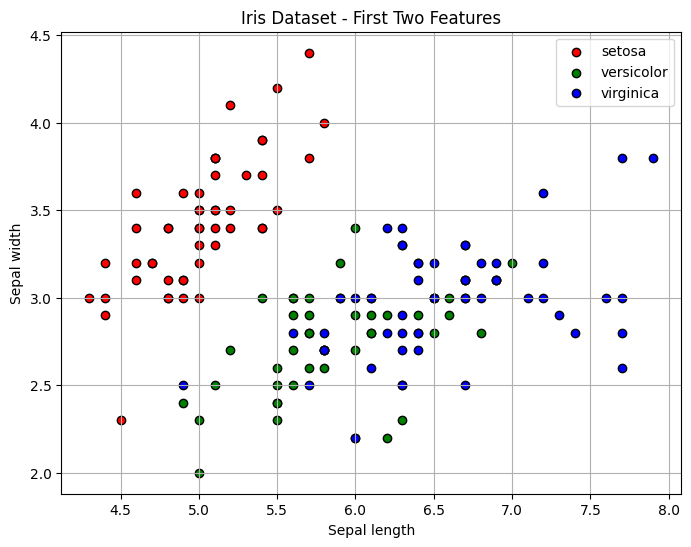

In [8]:
X = dataset.data[:, :2]  # we only take the first two features for visualization
y = dataset.target

plt.figure(figsize=(8, 6))

for i, c in zip(range(3), ['r', 'g', 'b']):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=dataset.target_names[i], edgecolors='k')

plt.title('Iris Dataset - First Two Features')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.grid(True)
plt.show()

In [9]:

# import the required modules
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# define the models
models = [
    ('LogisticRegression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('SVM', SVC()),
]

In [10]:
# perform cross-validation and print the results
for name, model in models:
    kFold = KFold(n_splits=10, shuffle=True, random_state=7)
    results = cross_val_score(model, X_train, Y_train, cv=kFold, scoring='accuracy')
    print(name, '=', results.mean(), ':', results.std())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression = 0.9666666666666666 : 0.04082482904638632
KNN = 0.95 : 0.05527707983925667
DecisionTree = 0.9333333333333332 : 0.06236095644623235
SVM = 0.9583333333333333 : 0.05590169943749474


In [11]:
#Train and Test with the selected model

LR=LogisticRegression ()
LR.fit(X_train,Y_train)
prediction=LR.predict(X_test)

accuracy_score(Y_test,prediction)

1.0

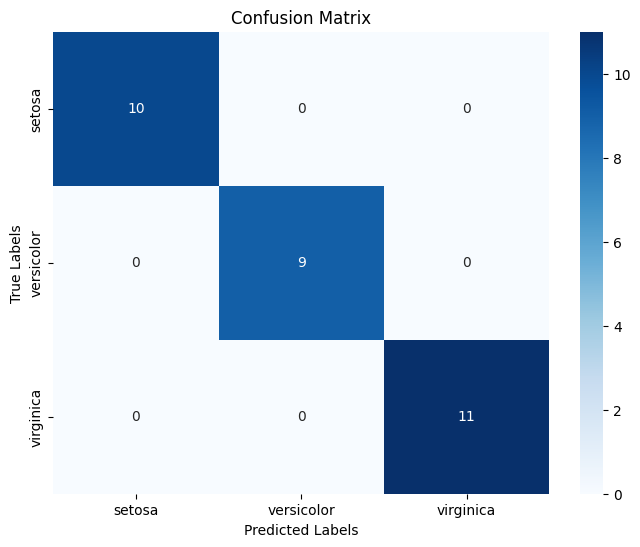

In [12]:
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.target_names, yticklabels=dataset.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Investigate the model type
print(type(LR))

# Investigate the model's parameters
print(LR.get_params())

# Investigate the model's predict method signature
print(LR.predict.__doc__)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

        Predict class labels for samples in X.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The data matrix for which we want to get the predictions.

        Returns
        -------
        y_pred : ndarray of shape (n_samples,)
            Vector containing the class labels for each sample.
        
